In [0]:
%%cmd
pip install watermark

In [0]:
#在这里必须分开cell，魔法命令必须是一个cell的第一部分内容
#注意load_ext这个命令只能够执行一次，再执行就会报错，要求用reload命令

In [0]:
!pip install watermark

In [0]:
%load_ext watermark

In [0]:
%watermark -a "ys" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn

ys 2019-01-15 

CPython 3.6.7
IPython 5.5.0

numpy 1.14.6
pandas 0.22.0
matplotlib 2.1.2
scipy 1.1.0
sklearn 0.20.2

compiler   : GCC 8.2.0
system     : Linux
release    : 4.14.79+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


# 高斯朴素贝叶斯GaussianNB

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [0]:
digits = load_digits() #手写数据集
X, y = digits.data, digits.target

In [0]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [0]:
Xtrain.shape #64个特征

(1257, 64)

In [0]:
Xtest.shape

(540, 64)

In [0]:
np.unique(Ytrain) #多分类问题，类别是10个

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
gnb = GaussianNB().fit(Xtrain,Ytrain)

In [0]:
#查看分数
acc_score = gnb.score(Xtest,Ytest) #返回预测的精确性 accuracy

In [0]:
acc_score

0.8592592592592593

In [0]:
#查看预测结果
Y_pred = gnb.predict(Xtest)

In [0]:
Y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [0]:
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)

In [0]:
prob

array([[0.00000000e+000, 4.69391744e-052, 1.74871280e-098, ...,
        0.00000000e+000, 4.19588993e-033, 1.51751459e-119],
       [0.00000000e+000, 1.00000000e+000, 9.26742456e-013, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.73608152e-026, ...,
        0.00000000e+000, 1.29541754e-039, 5.54684869e-077],
       ...,
       [0.00000000e+000, 2.43314963e-047, 4.82483668e-305, ...,
        2.31612692e-008, 1.23891596e-126, 2.87896140e-257],
       [0.00000000e+000, 8.26462929e-129, 4.99150558e-012, ...,
        0.00000000e+000, 4.01802372e-003, 6.19000712e-013],
       [0.00000000e+000, 9.99929965e-001, 1.45462767e-013, ...,
        5.05856094e-005, 1.94498169e-005, 3.42317317e-042]])

In [0]:
prob.shape #每一列对应一个标签类别下的概率

(540, 10)

In [0]:
prob[1,:].sum()

1.000000000000003

In [0]:
prob[3,:].sum() #每一行的和都是一

1.0

In [0]:
prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## 使用混淆矩阵来查看贝叶斯的分类结果

In [0]:
from sklearn.metrics import confusion_matrix as CM

In [0]:
CM(Ytest,Y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]])

##  探索贝叶斯：高斯朴素贝叶斯擅长的数据集

##  探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve #画学习曲线的类
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式的类
from time import time
import datetime

In [0]:
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [0]:
digits = load_digits()
X, y = digits.data, digits.target

In [0]:
X.shape

(1797, 64)

In [0]:
X #是一个稀疏矩阵

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"]
model = [GaussianNB(),DTC(),SVC(gamma=0.001)
         ,RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:05:873966
DecisionTree:00:03:431870
RandomForest:00:24:234845
Logistic:02:02:947937


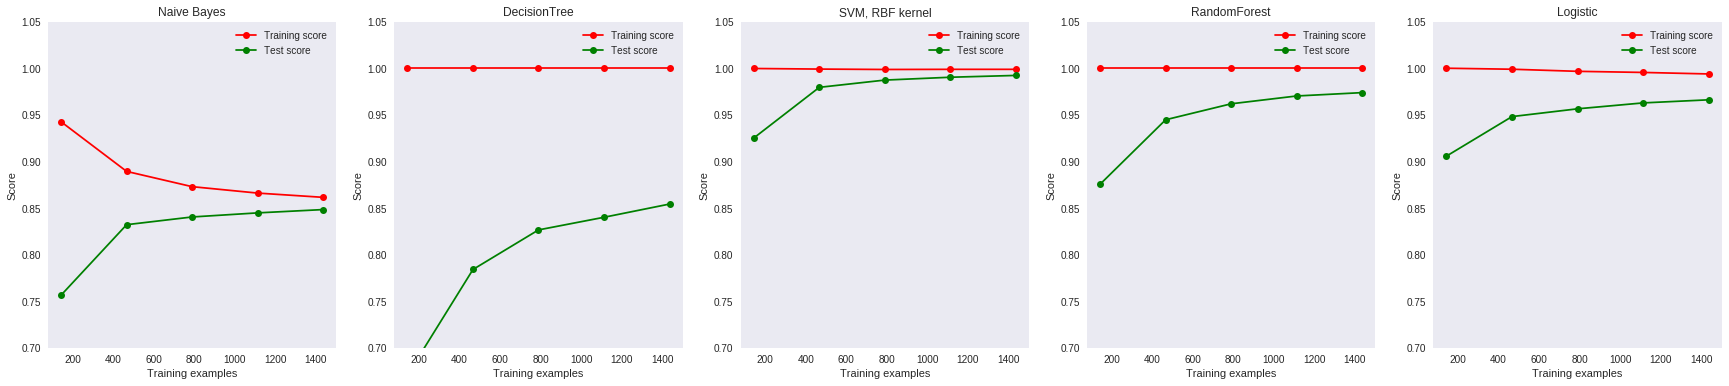

In [0]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

In [0]:
[*zip(range(len(title)),title,model)]

[(0, 'Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 (1,
  'DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 (2,
  'SVM, RBF kernel',
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 (3,
  'RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_s

In [0]:
#我输入我的分类器，我们的数据，画图所需要的一系列参数，交叉验证的模式，以及其他可能的参数
#一次性帮助我画出所有的学习曲线

#找出每个图像所需要的横纵坐标 - learning_curve
#设定好用来绘制子图所在的画布，就开始在画布上绘图

def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title) #设置标题
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [0]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=50 #把数据分为多少份
                  ,test_size=0.2 #20% * 50 份的数据会被作为测试集
                  ,random_state=0 #分交叉验证的份数的时候进行的随机抽样的模式
                 )

In [0]:
train_sizes, train_scores, test_scores = learning_curve(clf #分类器，clf
                                                        , X, y #特征矩阵和标签
                                                        ,cv=cv #表示交叉验证模式
                                                        ,n_jobs=4
                                                        #每次运行的时候可以允许算法使用多少运算资源
                                                       )

In [0]:
train_sizes #每次分训练集和测试集建模之后，训练集上的样本数量

array([ 143,  467,  790, 1113, 1437])

In [0]:
train_scores #训练集上的分数

array([[0.93006993, 0.94405594, 0.95104895, 0.87412587, 0.95804196,
        0.99300699, 0.95804196, 0.96503497, 0.95804196, 0.91608392,
        0.93006993, 0.97902098, 0.93706294, 0.90909091, 0.93006993,
        0.94405594, 0.97902098, 0.95804196, 0.96503497, 0.94405594,
        0.95104895, 0.95804196, 0.97202797, 0.9020979 , 0.96503497,
        0.9020979 , 0.83216783, 0.96503497, 0.93006993, 0.95804196,
        0.86013986, 0.94405594, 1.        , 0.93006993, 0.97202797,
        0.94405594, 0.98601399, 0.95804196, 0.97202797, 0.95804196,
        0.97902098, 0.97202797, 0.95804196, 0.95804196, 0.8951049 ,
        0.83216783, 0.93006993, 0.90909091, 0.95804196, 0.95804196],
       [0.90149893, 0.91006424, 0.90578158, 0.86509636, 0.8993576 ,
        0.91862955, 0.89721627, 0.90364026, 0.91220557, 0.86937901,
        0.82441113, 0.91220557, 0.90792291, 0.88008565, 0.88650964,
        0.90792291, 0.8608137 , 0.90364026, 0.88008565, 0.92077088,
        0.90149893, 0.87366167, 0.86295503, 0.8

In [0]:
train_scores.shape

(5, 50)

In [0]:
test_scores.shape

(5, 50)

# 概率类模型的评估指标

## 1 布里尔分数Brier Score

In [0]:
from sklearn.metrics import brier_score_loss

In [0]:
prob.shape 

(540, 10)

In [0]:
#注意，第一个参数是真实标签，第二个参数是预测出的概率值
#在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只会返回一列
#要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
brier_score_loss(Ytest, prob[:,1], pos_label=1)
#我们的pos_label与prob中的索引一致，就可以查看这个类别下的布里尔分数是多少

0.032619662406118764

### 测试

In [0]:
prob[:,1].shape[0]

540

In [0]:
np.sum((prob[:,1]-1)**2)/prob[:,1].shape[0]

0.8999929141952214

不是这么简单的计算..

### 逻辑回归，SVC和我们的高斯朴素贝叶斯的效果

In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

In [0]:
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
Xtrain.shape

(1257, 64)

In [0]:
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto").fit(Xtrain,Ytrain)
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,Ytrain)

In [0]:
brier_score_loss(Ytest,logi.predict_proba(Xtest)[:,1],pos_label=1)

0.011422731531754838

In [0]:
svc.decision_function(Xtest)

array([[ 6.04999568,  3.90384836,  2.90874813, ..., -0.25222764,
         8.30994867,  0.77613135],
       [-0.21449942,  9.28421434,  6.08114168, ...,  0.78220746,
         7.09763534,  3.98412779],
       [ 0.77940329,  2.9077248 ,  7.08524427, ...,  6.07973767,
         8.21109292,  5.10728844],
       ...,
       [ 4.96967342,  5.01152151, -0.18621393, ...,  8.13760707,
         6.13234107,  1.8288879 ],
       [ 2.9476444 ,  2.73284495,  6.10781709, ...,  2.99252742,
         8.26833873,  7.085248  ],
       [-0.245529  ,  9.32817444,  4.99213102, ...,  5.98483642,
         7.18223468,  1.87536216]])

In [0]:
#由于SVC的置信度并不是概率，为了可比性，我们需要将SVC的置信度“距离”归一化，压缩到[0,1]之间
svc_prob = (svc.decision_function(Xtest) - svc.decision_function(Xtest).min())/(svc.decision_function(Xtest).max() - svc.decision_function(Xtest).min())

In [0]:
brier_score_loss(Ytest,svc_prob[:,1],pos_label=1)

0.23818950248917947

### 布里尔分数可视化

In [0]:
import pandas as pd
name = ["Bayes","Logistic","SVC"]
color = ["red","black","orange"]

In [0]:
df = pd.DataFrame(index=range(10),columns=name)

In [0]:
df

,Bayes,Logistic,SVC
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [0]:
for i in range(10):
    df.loc[i,name[0]] = brier_score_loss(Ytest,prob[:,i],pos_label=i) #标签为i的时候的贝叶斯下的布里尔分数
    df.loc[i,name[1]] = brier_score_loss(Ytest,logi.predict_proba(Xtest)[:,i],pos_label=i) #标签为i的时候逻辑回归下的布里尔分数
    df.loc[i,name[2]] = brier_score_loss(Ytest,svc_prob[:,i],pos_label=i) #SVC下的布里尔分数

In [0]:
df.shape[1]

3

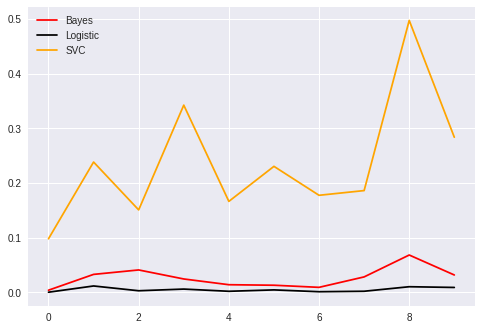

In [0]:
for i in range(df.shape[1]):
    plt.plot(range(10),df.iloc[:,i],c=color[i])
plt.legend()
plt.show()

In [0]:
df

,Bayes,Logistic,SVC
0,0.00368051,8.63311e-06,0.0977746
1,0.0326197,0.0114227,0.23819
2,0.040738,0.0026691,0.150612
3,0.0242275,0.00573814,0.342311
4,0.0137171,0.00169625,0.166205
5,0.0127707,0.00423538,0.230307
6,0.00890695,0.000908444,0.17735
7,0.0280067,0.00176068,0.18596
8,0.0680707,0.0100405,0.497354
9,0.0315248,0.00871922,0.283608


## 2 对数似然函数Log Loss

In [0]:
from sklearn.metrics import log_loss

In [0]:
log_loss(Ytest,prob)

2.4725653911460683

In [0]:
log_loss(Ytest,logi.predict_proba(Xtest))

0.12760008166154135

In [0]:
log_loss(Ytest,svc_prob)

1.625556312147472

## 3 可靠性曲线Reliability Curve

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [0]:
X, y = mc(n_samples=100000,n_features=20 #总共20个特征
          ,n_classes=2 #标签为2分类
          ,n_informative=2 #其中两个代表较多信息
          ,n_redundant=10 #10个都是冗余特征
          ,random_state=42)

In [0]:
X.shape

(100000, 20)

In [0]:
np.unique(y)

array([0, 1])

In [0]:
#样本量足够大，因此使用1%的样本作为训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y
                                                ,test_size=0.99 #训练集会很小，测试集会很大
                                                ,random_state=42)

In [0]:
Xtrain.shape

(1000, 20)

In [0]:
Xtest.shape

(99000, 20)

In [0]:
np.unique(Ytrain)

array([0, 1])

In [0]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1] #我们的预测概率 - 横坐标
clf_score = gnb.score(Xtest,Ytest)
#Ytest - 我们的真实标签 - 横坐标

In [0]:
#在我们的横纵坐标上，概率是由顺序的（由小到大），为了让图形规整一些，我们要先对预测概率和真实标签按照预测概率进行一个排序，这一点我们通过DataFrame来实现

df = pd.DataFrame({"ytrue":Ytest[:500],"probability":prob_pos[:500]})
#利用字典来创建DataFrame({"列的名称":[列的值]})

In [0]:
df

,probability,ytrue
0,9.999997e-01,1
1,9.999964e-01,0
2,1.000000e+00,1
3,9.886612e-01,1
4,8.441773e-18,0
5,9.858597e-01,0
6,4.473008e-07,0
7,9.999023e-01,1
8,1.473024e-03,0
9,1.874007e-09,0


In [0]:
df = df.sort_values(by="probability")

In [0]:
df.index = range(df.shape[0])

In [0]:
df

,probability,ytrue
0,9.999997e-01,1
1,9.999964e-01,0
2,1.000000e+00,1
3,9.886612e-01,1
4,8.441773e-18,0
5,9.858597e-01,0
6,4.473008e-07,0
7,9.999023e-01,1
8,1.473024e-03,0
9,1.874007e-09,0


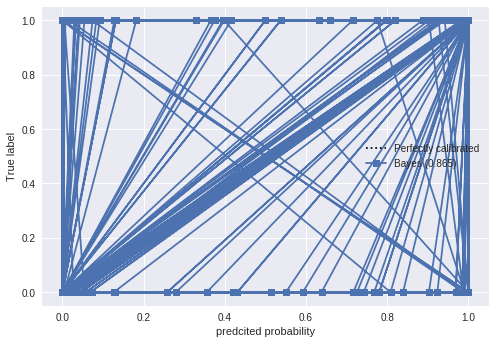

In [0]:
#紧接着我们就可以画图了
fig = plt.figure() #画布
ax1 = plt.subplot() #建立一个子图
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"],"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

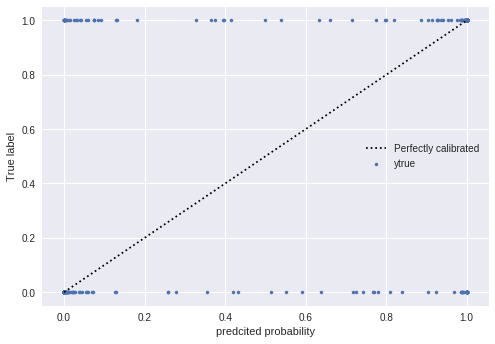

In [0]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.scatter(df["probability"],df["ytrue"],s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

### 使用可靠性曲线的类在贝叶斯上绘制一条校准曲线

In [0]:
from sklearn.calibration import calibration_curve

In [0]:
#从类calibiration_curve中获取横坐标和纵坐标
trueproba, predproba = calibration_curve(Ytest, prob_pos
                                         ,n_bins=10 #输入希望分箱的个数
                                        )

In [0]:
trueproba.shape

(10,)

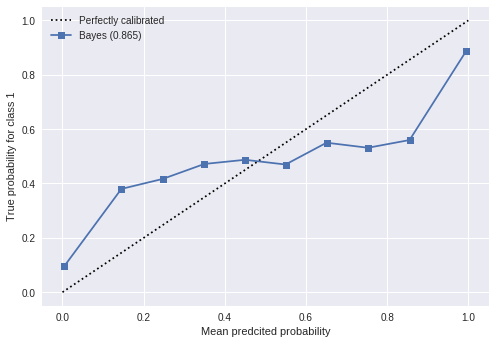

In [0]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

不同的n_bins取值下曲线如何改变

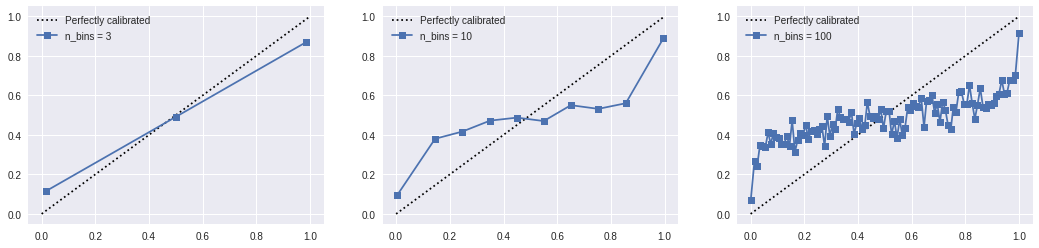

In [0]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=i)
    ax.plot(predproba, trueproba,"s-",label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

In [0]:
name = ["GaussianBayes","Logistic","SVC"]

gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
svc = SVC(kernel = "linear",gamma=1) #置信度

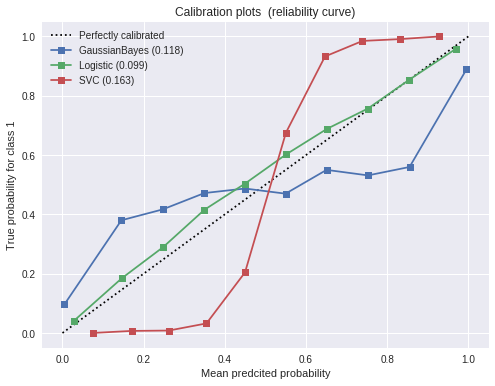

In [0]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
    
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots  (reliability curve)')
plt.show()

## 4 预测概率的直方图

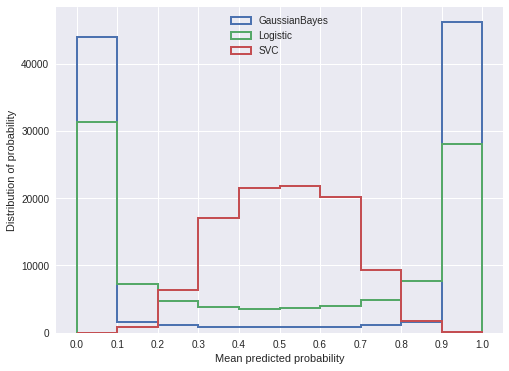

In [0]:
fig, ax2 = plt.subplots(figsize=(8,6))

for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos #预测概率
             ,bins=10
             ,label=name_
             ,histtype="step" #设置直方图为透明
             ,lw=2 #设置直方图每个柱子描边的粗细
            )
    
ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

## 5 校准可靠性曲线

In [0]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)
    
    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

In [0]:
from sklearn.calibration import CalibratedClassifierCV

In [0]:
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]

gnb = GaussianNB()

models = [gnb
          ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
        #定义两种校准方式
          ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
          ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

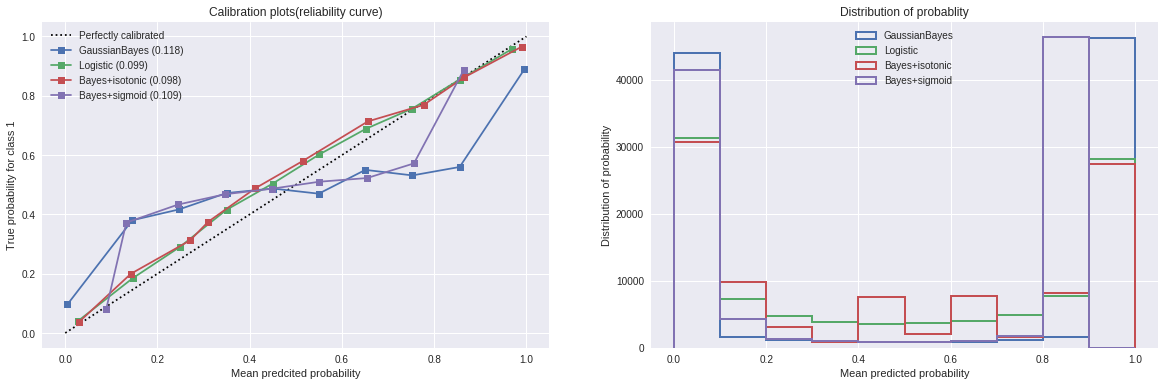

In [0]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [0]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest)

0.8650606060606061

In [0]:
brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1)

0.11760826355000836

In [0]:
gnbsigmoid = CalibratedClassifierCV(gnb, cv=2, method='sigmoid').fit(Xtrain,Ytrain)
gnbsigmoid.score(Xtest,Ytest)

0.8653030303030304

In [0]:
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)
gnbisotonic.score(Xtest,Ytest)

0.8626767676767677

In [0]:
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label = 1)

0.09833190251353853

In [0]:
name_svc = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]

svc = SVC(kernel = "linear",gamma=1)

models_svc = [svc
              ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
              #依然定义两种校准方式
              ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
              ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

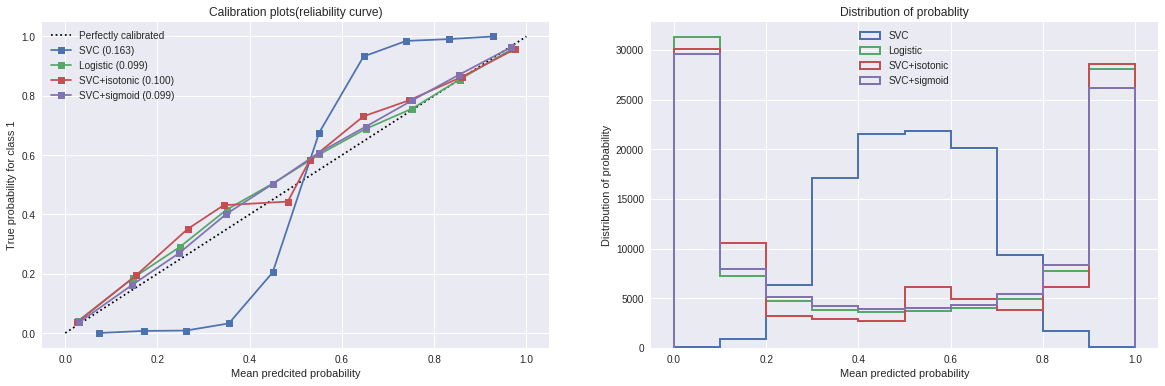

In [0]:
plot_calib(models_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest)

In [0]:
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]

svc = SVC(kernel = "linear",gamma=1)

models_svc = [svc
              ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
              ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1630
	Accuracy:0.8633
SVC+isotonic:
	Brier:0.0999
	Accuracy:0.8639
SVC+sigmoid:
	Brier:0.0987
	Accuracy:0.8634


# 多项式朴素贝叶斯以及其变化

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

In [0]:
class_1 = 500 
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [3]:
X.shape

(1000, 2)

In [0]:
import numpy as np

In [6]:
np.unique(y)

array([0, 1])

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)

In [0]:
mms = MinMaxScaler().fit(Xtrain) #训练集上来实例化和训练我们的模型
# 为了保证数据中没有负数
Xtrain_ = mms.transform(Xtrain)

Xtest_ = mms.transform(Xtest)

In [0]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [10]:
#重要属性：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
#由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [11]:
Ytrain == 1 #计数：所有标签类别=1的样本量

array([ True, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,

In [12]:
(Ytrain == 0).sum()/Ytrain.shape[0]

0.5014285714285714

In [0]:
mnb.class_log_prior_.shape #永远等于标签中所带的类别数量

(2,)

In [13]:
#可以使用np.exp来查看真正的概率值
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [14]:
#重要属性：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [15]:
mnb.feature_log_prob_.shape #2个特征，2个标签

(2, 2)

In [16]:
#重要属性：在fit时每个标签类别下包含的样本数
#当fit接口中的sample_weight被设置时，该接口返回的值也会受到加权的影响
mnb.class_count_
# 训练集700个样本，351个标签为0样本，349个标签为1样本

array([351., 349.])

In [17]:
mnb.class_count_.shape #返回和我们的标签类别一样的结构

(2,)

In [18]:
#一些传统的接口
mnb.predict(Xtest_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
mnb.predict_proba(Xtest_) #每个样本在每个标签取值下的概率

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [20]:
mnb.score(Xtest_,Ytest)

0.5433333333333333

In [21]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

0.24977828412546027

In [0]:
#原数据是连续性数据
#来试试看把Xtiain转换成分类型数据吧
#注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了
from sklearn.preprocessing import KBinsDiscretizer #对连续性变量进行分箱
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)

In [0]:
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [24]:
Xtrain_.shape #2个特征中，每个特征分了10个箱所分出来的哑变量

(700, 20)

In [0]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [26]:
mnb.score(Xtest_,Ytest)

0.9966666666666667

In [27]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

0.0014593932778211862

## 伯努利朴素贝叶斯BernoulliNB

二项分布

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
#普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
#然而这样效率过低，因此我们选择归一化之后直接设置一个阈值

mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [30]:
#不设置二值化
bnl_ = BernoulliNB().fit(Xtrain_, Ytrain)
bnl_.score(Xtest_,Ytest)

0.49666666666666665

In [31]:
brier_score_loss(Ytest,bnl_.predict_proba(Xtest_)[:,1],pos_label=1)

0.25000009482193225

In [32]:
#设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_,Ytest)

0.9833333333333333

In [33]:
brier_score_loss(Ytest,bnl.predict_proba(Xtest_)[:,1],pos_label=1)

0.010405875827339534

## 探索贝叶斯：贝叶斯的样本不均衡问题

In [0]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

In [0]:
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本 1%
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [36]:
X.shape

(50500, 2)

In [37]:
np.unique(y)

array([0, 1])

In [0]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

In [0]:
for name,clf in zip(name,models):
    #分测试集和训练集
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)
    #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    #拟合&结果
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest) #准确率
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


少数类的效果比较差

## 改进多项式朴素贝叶斯：补集朴素贝叶斯ComplementNB

In [39]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

name = ["Multinomial","Gaussian","Bernoulli","Complement"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]

for name,clf in zip(name,models):
    times = time()
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)
    #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:056550
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:025651
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:048315
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:045882


# 案例：贝叶斯分类器做文本分类

## 文本编码技术简介

单词计数向量

In [0]:
sample = ["Machine learning is fascinating, it is wonderful"
          ,"Machine learning is a sensational techonology"
          ,"Elsa is a popular character"]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vec = CountVectorizer()

In [0]:
X = vec.fit_transform(sample)

In [44]:
X

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [45]:
#使用接口get_feature_names()调用每个列的名称

vec.get_feature_names() #按照字母的顺序排列

['character',
 'elsa',
 'fascinating',
 'is',
 'it',
 'learning',
 'machine',
 'popular',
 'sensational',
 'techonology',
 'wonderful']

In [0]:
import pandas as pd

In [0]:
#注意稀疏矩阵是无法输入pandas的
CVresult = pd.DataFrame(X.toarray(),columns = vec.get_feature_names())

In [48]:
CVresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
vec = TFIDF()

In [0]:
X = vec.fit_transform(sample)

In [51]:
X #每一个单词作为一个特征，每个单词在这个句子中所占的比例

<3x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [0]:
#同样使用接口get_feature_names()调用每个列的名称
TFIDFresult = pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

In [53]:
TFIDFresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0.000000,0.000000,0.424396,0.501310,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.424396
1,0.000000,0.000000,0.000000,0.315444,0.000000,0.406192,0.406192,0.000000,0.534093,0.534093,0.000000
2,0.546454,0.546454,0.000000,0.322745,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000


In [0]:
#使用TF-IDF编码之后，出现得多的单词的权重被降低了么？ theta

In [54]:
CVresult.sum(axis=0)

character      1
elsa           1
fascinating    1
is             4
it             1
learning       2
machine        2
popular        1
sensational    1
techonology    1
wonderful      1
dtype: int64

In [0]:
CVresult.sum(axis=0)/CVresult.sum(axis=0).sum()

character      0.0625
elsa           0.0625
fascinating    0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
techonology    0.0625
wonderful      0.0625
dtype: float64

In [0]:
TFIDFresult.sum(axis=0) / TFIDFresult.sum(axis=0).sum()
#将原本出现次数比较多的词压缩我们的权重
#将原本出现次数比较少的词增加我们的权重

character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
techonology    0.081192
wonderful      0.064516
dtype: float64

## 探索文本数据

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [56]:
#初次使用这个数据集的时候，会在实例化的时候开始下载
data = fetch_20newsgroups()

In [0]:
#通常我们使用data来查看data里面到底包含了什么内容
#但由于fetch_20newsgourps这个类加载出的数据巨大，数据结构中混杂很多文字，因此很难去看清

In [58]:
#不同类型的新闻
#标签的分类都有哪些
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
#其实fetch_20newsgroups也是一个类，既然是类，应该就有可以调用的参数
#面对简单数据集，我们往往在实例化的过程中什么都不写，但是现在data中数据量太多，不方便探索
#因此我们需要来看看我们的类fetch_20newsgroups都有什么样的参数可以帮助我们

In [0]:
import numpy as np
import pandas as pd

categories = ["sci.space" #科学技术 - 太空
              ,"rec.sport.hockey" #运动 - 曲棍球
              ,"talk.politics.guns" #政治 - 枪支问题
              ,"talk.politics.mideast"] #政治 - 中东问题

train = fetch_20newsgroups(subset="train",categories = categories)
test = fetch_20newsgroups(subset="test",categories = categories)

In [0]:
train
#可以观察到，里面依然是类字典结构，我们可以通过使用键的方式来提取内容

Output hidden; open in https://colab.research.google.com to view.

In [60]:
train.target_names #四个类别，四个目录下的标签的分类

['rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast']

In [61]:
#查看总共有多少篇文章存在
len(train.data)

2303

In [0]:
#随意提取一篇文章来看看
print(train.data[0])

From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)
Subject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)
Nntp-Posting-Host: vipunen.hut.fi
Organization: Helsinki University of Technology, Finland
Lines: 51

In <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:

>: FINLAND:  
>: 
>: D-Jyrki Lumme.......20
>: D-Teppo Numminen....20
>: D-Peter Ahola.......13
>: 
>Well well, they don't like our defenders (mainly Lumme and Numminen)...

About 25 is correct for Numminen and Lumme.


>: R-Teemu Selanne.....27
>: 
>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.

No, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.

>: well in the Canada Cup and World Championships largely due to the efforts of
>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's
>: presumably a lot of decent players in Finland that wouldn't be superstars at
>: the highest level but still valuable rol

In [62]:
#查看一下我们的标签
np.unique(train.target)

array([0, 1, 2, 3])

In [63]:
len(train.target)

2303

In [64]:
#是否存在样本不平衡问题？
for i in [1,2,3]:
	print(i,(train.target == i).sum()/len(train.target))

1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


## 使用TF-IDF将文本数据编码

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

In [0]:
Xtrain = train.data
Xtest = test.data
Ytrain = train.target
Ytest = test.target

In [0]:
tfidf = TFIDF().fit(Xtrain)
Xtrain_ = tfidf.transform(Xtrain)
Xtest_ = tfidf.transform(Xtest)

In [68]:
Xtrain_

<2303x40725 sparse matrix of type '<class 'numpy.float64'>'
	with 430306 stored elements in Compressed Sparse Row format>

In [0]:
tosee = pd.DataFrame(Xtrain_.toarray(),columns=tfidf.get_feature_names())

In [70]:
tosee.head()

,00,000,0000,00000,000000,000021,000062david42,000152,000246,000256,...,zwrm,zx,zx6wre,zxp,zxqi,zy,zyg,zz,zz_g9q3,zzzzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.058046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
tosee.shape

(2303, 40725)

In [0]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import brier_score_loss as BS

name = ["Multinomial","Complement","Bournulli"]
#注意高斯朴素贝叶斯不接受稀疏矩阵
models = [MultinomialNB(),ComplementNB(),BernoulliNB()]

In [72]:
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    
    #4个不同的标签取值下的布里尔分数
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest,proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
        
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under rec.sport.hockey:0.018
	Brier under sci.space:0.033
	Brier under talk.politics.guns:0.030
	Brier under talk.politics.mideast:0.026
	Average Brier:0.027
	Accuracy:0.975


Complement
	Brier under rec.sport.hockey:0.023
	Brier under sci.space:0.039
	Brier under talk.politics.guns:0.039
	Brier under talk.politics.mideast:0.033
	Average Brier:0.033
	Accuracy:0.986


Bournulli
	Brier under rec.sport.hockey:0.068
	Brier under sci.space:0.025
	Brier under talk.politics.guns:0.045
	Brier under talk.politics.mideast:0.053
	Average Brier:0.048
	Accuracy:0.902




In [0]:
from sklearn.calibration import CalibratedClassifierCV

name = ["Multinomial"
        ,"Multinomial + Isotonic"
        ,"Multinomial + Sigmoid"
        ,"Complement"
        ,"Complement + Isotonic"
        ,"Complement + Sigmoid"
        ,"Bernoulli"
        ,"Bernoulli + Isotonic"
        ,"Bernoulli + Sigmoid"]

models = [MultinomialNB()
          ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
          ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
          ,ComplementNB()
          ,CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
          ,CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
          ,BernoulliNB()
          ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
          ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
         ]

In [74]:
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest,proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under rec.sport.hockey:0.018
	Brier under sci.space:0.033
	Brier under talk.politics.guns:0.030
	Brier under talk.politics.mideast:0.026
	Average Brier:0.027
	Accuracy:0.975


Multinomial + Isotonic
	Brier under rec.sport.hockey:0.006
	Brier under sci.space:0.012
	Brier under talk.politics.guns:0.013
	Brier under talk.politics.mideast:0.009
	Average Brier:0.010
	Accuracy:0.973


Multinomial + Sigmoid
	Brier under rec.sport.hockey:0.006
	Brier under sci.space:0.012
	Brier under talk.politics.guns:0.013
	Brier under talk.politics.mideast:0.009
	Average Brier:0.010
	Accuracy:0.973


Complement
	Brier under rec.sport.hockey:0.023
	Brier under sci.space:0.039
	Brier under talk.politics.guns:0.039
	Brier under talk.politics.mideast:0.033
	Average Brier:0.033
	Accuracy:0.986


Complement + Isotonic
	Brier under rec.sport.hockey:0.004
	Brier under sci.space:0.007
	Brier under talk.politics.guns:0.009
	Brier under talk.politics.mideast:0.006
	Average Brier:0.006
	Accuracy:0.9